# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import random as random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
import plotly.express as px
cf.go_offline()
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/Users/Nonis/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def rolling(n):
    dice = [1,2,3,4,5,6]
    rollings = []
    for i in range(n):
        rollings.append(random.choice(dice))
    return rollings
data = rolling(10)
df = pd.DataFrame(data, columns = ['results']).reset_index()
df.rename(columns={'index':'rollings'},inplace=True)
df['rollings'] = df['rollings'].apply(lambda x:x+1)
df

,rollings,results
0,1,4
1,2,1
2,3,6
3,4,2
4,5,6
5,6,2
6,7,5
7,8,2
8,9,3
9,10,6


#### 2.- Plot the results sorted by value.

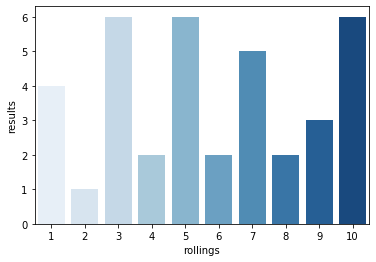

In [3]:
# your code here
sns.barplot(x='rollings', y='results',data=df,palette='Blues')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [4]:
# your code here
freq = df.groupby('results').size().reset_index()
freq.rename(columns={'results':'face',0:'freq'},inplace=True)
freq

,face,freq
0,1,1
1,2,3
2,3,1
3,4,1
4,5,1
5,6,3


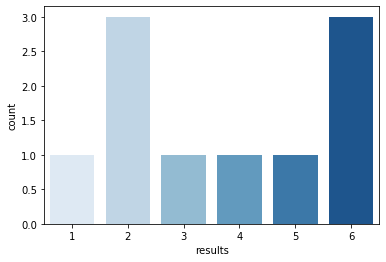

In [5]:
sns.countplot(df['results'],palette='Blues')

In [6]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def mean(df):
    return sum(df['results'])/len(df['results'])
 

mean(df)

3.7

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def frequency_distribution(x):
    unique, counts = np.unique(x, return_counts=True)
    freq_dstr = dict(zip(unique, counts))
    return freq_dstr
freq_dstr = frequency_distribution(data)
freq_dstr

{1: 1, 2: 3, 3: 1, 4: 1, 5: 1, 6: 3}

In [9]:
mean = sum(freq_dstr.values())/len(freq_dstr)
mean

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here
def median(df):
    rolls = df['results'].sort_values().to_list()
    if len(rolls)%2 == 0:
        return (rolls[len(rolls)//2]+rolls[(len(rolls)//2)-1])/2
    else:
        return rollings[(len(rolls)//2)]

median(df)

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
# your code here

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

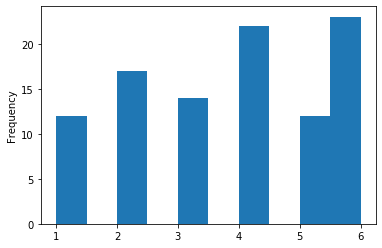

In [12]:
# your code here

df_2 = pd.read_csv('../data/roll_the_dice_hundred.csv')
df_2['value'].plot.hist();

In [13]:
"""
your comments here

We see the frequency face of the rollings
"""

'\nyour comments here\n\nWe see the frequency face of the rollings\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [20]:
# your code here
def mean(df_2):
    return sum(df_2['value'])/len(df_2['value'])
 

mean(df_2)

3.74

#### 3.- Now, calculate the frequency distribution.


In [24]:
# your code here
df_2['value'].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

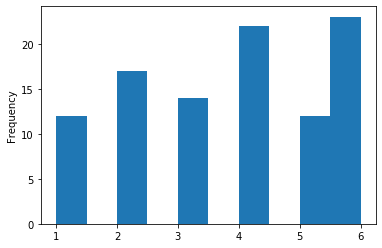

In [27]:
# your code here
df_2['value'].plot.hist()

In [ ]:
"""
your comments here
Our mean is 3.74 because the most common values of our rolls are 4 and 6
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

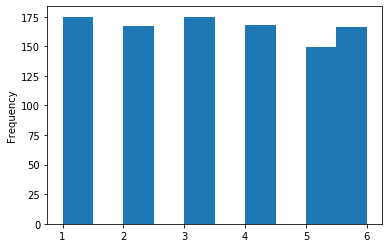

In [29]:
# your code here
df_2 = pd.read_csv('../data/roll_the_dice_thousand.csv')
df_2['value'].plot.hist();

In [ ]:
"""
your comments here

The number of rollings is higher, that's why there are less diference bewtween the frequencies of each face
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

'\nmean around 35-38\n'

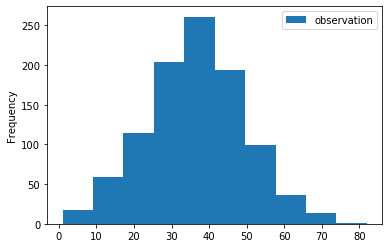

In [41]:
# your code here
df = pd.read_csv('../data/ages_population.csv')

df.plot.hist()

'''
mean around 35-38
'''

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [38]:
# your code here
df['observation'].mean()

36.56

In [39]:
df['observation'].std()

12.81649962597677

In [42]:
"""
your comments here
The mean is easier to guess
"""

'\nyour comments here\nThe mean is easier to guess\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

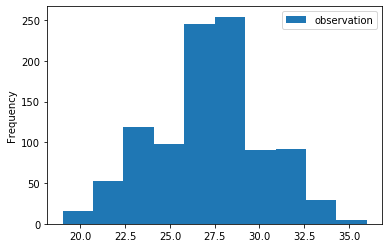

In [46]:
# your code here
df = pd.read_csv('../data/ages_population2.csv')
df.plot.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
We are only looking from 25 to 35 years old
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [47]:
# your code here
df['observation'].mean()

27.155

In [48]:
df['observation'].std()

2.9698139326891835

In [49]:
"""
your comments here
the std is lower as there is less difference between the observations.
The mean is lower too as we are only looking ages from 20 to 35.
"""

'\nyour comments here\nthe std is lower as there is less difference between the observations.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

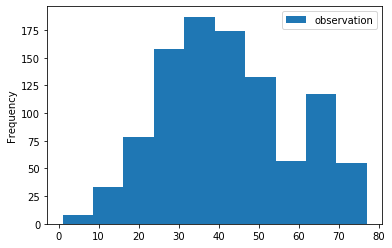

In [50]:
# your code here
df = pd.read_csv('../data/ages_population3.csv')

df.plot(kind = 'hist')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [51]:
# your code here
df['observation'].mean()

41.989

In [52]:
df['observation'].std()

16.14470595986593

In [ ]:
"""
your comments here
The most common ages are from 30 to 40 and 60 to 70, the people from this dataset is older
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [54]:
# your code here
percent = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
np.percentile(df['observation'],percent)

array([22., 28., 32., 36., 40., 45., 50., 57., 67., 77.])

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""